<h1><font color='blue'> 9E and 9F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 9E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [3]:
# you can write your code here
data = np.hstack((X, y.reshape(5000,1)))
data.shape

(5000, 6)

In [4]:
X_train,X_rem,Y_train,Y_rem = train_test_split(X,y,test_size=0.40,random_state=16)
X_cv,X_test,Y_cv,Y_test = train_test_split(X_rem,Y_rem,test_size=0.50,random_state=16)

X_train.shape,X_cv.shape,X_test.shape

((3000, 5), (1000, 5), (1000, 5))

In [5]:
model = SVC(gamma = 0.001, C = 100)
model.fit(X_train,Y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
f_cv = model.decision_function(X_cv)
# f_cv

In [7]:
def calculate_rbf(X_i,X_q):
#     k = np.exp(-model.gamma * np.linalg.norm(X_i-X_q))
    k = np.exp(-model.gamma * np.dot(X_i-X_q, X_i-X_q))
    return k

In [8]:
from tqdm import tqdm

def custom_decision_function(Xcv): #use appropriate parameters
    ycv = np.zeros(Xcv.shape[0]).reshape((Xcv.shape[0],1))
    for i in tqdm(range(Xcv.shape[0])): 
        sum = 0
        for j in range(model.support_vectors_.shape[0]):
            kernal = calculate_rbf(model.support_vectors_[j],Xcv[i])
            sum += kernal*model.dual_coef_[0][j]
        ycv[i] = sum + model.intercept_
    return ycv

In [9]:
f_cv_custom = custom_decision_function(X_cv)
f_test_custom = custom_decision_function(X_test)

100%|██████████| 1000/1000 [00:06<00:00, 145.36it/s]


In [10]:
(f_cv_custom - f_cv.reshape(1000,1))[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

<h2><font color='Geen'> 9F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [11]:
N_positive = 0
N_negative = 0
for i in range(len(Y_cv)):
    if Y_cv[i] > 0:
        N_positive +=1
    else: 
        N_negative +=1
y_positive = (N_positive + 1) / (N_positive + 2)
y_negative = 1/(N_negative + 2)

N_positive,N_negative,y_positive,y_negative

(305, 695, 0.996742671009772, 0.0014347202295552368)

In [12]:
f_cv_custom[0]

array([-1.80554548])

In [13]:
import math

def sigmoid(x,w,b):
    a = np.dot(x,w)+b
    return 1/(1 + math.exp(-a))

In [14]:
class CustomSGDClassifier:
    def __init__(self,alpha = 0.0001,N = len(X_train),b = 0,w = np.zeros_like(X_train[0]),eta0 = 0.0001,ephocs = 1):
        self.alpha = alpha
        self.N = N
        self.b = b
        self.w = w
        self.eta0 = eta0
        self.ephocs = ephocs
        self.train_loss = []
        self.result = []
    
    def calculateLoss(self,w,b,X,Y):
        loss = []
        for i in np.arange(0,len(X)):
            sig = sigmoid(X[i],w,b)
            if Y[i] > 0:
                loss.append(-y_positive*np.log(sig) - (1-y_positive)*np.log(1-sig) + self.alpha*np.dot(w,w)/2)
            else:
                loss.append(-y_negative*np.log(sig) - (1-y_negative)*np.log(1-sig) + self.alpha*np.dot(w,w)/2)
        return np.mean(loss)
    
    def fit(self,X,Y):
        initial_loss = self.calculateLoss(w,b,X,Y)
#         print('Initial Loss:',initial_loss)
        for ep in range(self.ephocs):
            for i in range(N):
                sig = sigmoid(X[i],self.w,self.b)
                w_new = (1- (self.alpha*self.eta0)/self.N)*self.w + self.eta0*X[i]*(Y[i]-sig)
                b_new = self.b + self.eta0*(Y[i]-sig)
                self.w = w_new
                self.b = b_new
            next_loss = self.calculateLoss(self.w,self.b,X,Y)
            self.train_loss.append(next_loss)
            print('-- Epoch: {}, Avg. Train Loss: {}'.format(ep+1,next_loss))
            if (next_loss < initial_loss) & ((initial_loss-next_loss)<0.001):
                break
            initial_loss = next_loss
            
    def getProbability(self,X):
        res = []
        for i in range(len(X)):
            prob = 1/(1+math.exp(-(self.w*X[i]+self.b)))
            res.append(prob)
        return res


In [15]:
w = np.zeros_like(f_cv_custom[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N = len(f_cv_custom)
# f_test_custom = custom_decision_function(X_test)
ephocs=60
model = CustomSGDClassifier(alpha,N,b,w,eta0,ephocs)
%time model.fit(f_cv_custom,Y_cv)

-- Epoch: 1, Avg. Train Loss: 0.6079155706248737
-- Epoch: 2, Avg. Train Loss: 0.5432836790075528
-- Epoch: 3, Avg. Train Loss: 0.49358708840014864
-- Epoch: 4, Avg. Train Loss: 0.4547003818858166
-- Epoch: 5, Avg. Train Loss: 0.42371468946471313
-- Epoch: 6, Avg. Train Loss: 0.39859299715826124
-- Epoch: 7, Avg. Train Loss: 0.3778994410869025
-- Epoch: 8, Avg. Train Loss: 0.3606085361894483
-- Epoch: 9, Avg. Train Loss: 0.3459761556072111
-- Epoch: 10, Avg. Train Loss: 0.33345327076465753
-- Epoch: 11, Avg. Train Loss: 0.3226281158110312
-- Epoch: 12, Avg. Train Loss: 0.3131870226728602
-- Epoch: 13, Avg. Train Loss: 0.30488754386278194
-- Epoch: 14, Avg. Train Loss: 0.2975397344274488
-- Epoch: 15, Avg. Train Loss: 0.29099291865545984
-- Epoch: 16, Avg. Train Loss: 0.28512619511616644
-- Epoch: 17, Avg. Train Loss: 0.2798415264456194
-- Epoch: 18, Avg. Train Loss: 0.27505864189224627
-- Epoch: 19, Avg. Train Loss: 0.2707112289054954
-- Epoch: 20, Avg. Train Loss: 0.2667440535831429
-

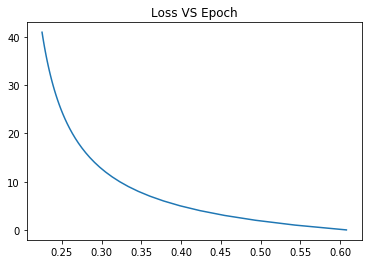

In [20]:
import matplotlib.pyplot as plt

# Plotting Loss and Epoch
plt.plot(model.train_loss, range(len(model.train_loss)))
plt.title('Loss VS Epoch')
plt.show()

In [21]:
model.w,model.b

(array([1.12246588]), -0.10995353241853036)

In [22]:
prob_test = model.getProbability(f_test_custom)
prob_test[0:5]

[0.01596275869878887,
 0.6256673966097421,
 0.8474897736634276,
 0.8920350885870294,
 0.05398627856798464]

In [23]:
correct = 0
for i in range(len(Y_test)):
    if (prob_test[i] > 0.5 and Y_test[i]==1) or (prob_test[i] < 0.5 and Y_test[i]==0):
        correct += 1
        
correct,len(Y_test)

(932, 1000)